In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data and save as a grouped csv, this step was only run once to group data, 
# some manual modifications were made on the grouped spreadsheet

dfList = []

journal_list = ['Sustainable cities and society', 'Global Change Biology',
                     'IEEE Transactions on Smart Grid', 'International Journal of Produc', 
                     'Water Resources Management']

file = open('data/modelling_reading.xlsx', 'rb')
for journal in journal_list:
    dfJournal = pd.read_excel(file, sheet_name=journal, engine='openpyxl')
    dfJournal['journal'] = journal
    dfList.append(dfJournal)

  
dfList[3]['journal'] = 'International Journal of Production Research'
df = pd.concat(dfList, ignore_index=True)

# Cleaning data

## Replace False and True by numbers
df = df.replace(False, 0)
df = df.replace(True, 1)

df = df.replace('Compound indexes with mostly individual level components', 
                        'Compound indicator at individual level')
df = df.replace('Compound indexes with mostly system level components', 
                        'Compound indicator at system level')

df.to_excel('data/modelling_grouped.xlsx')

/home/vitor/.local/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [3]:
# Drop columns that will not be used
drop_columns = ['Metric name (optional)', 'System modelled', 'Disturbance modelled', 'Model type',
                'Why diversity', 'Justification from question 1', 'Justification from question 2',
                'Justification from question 3', 'Metric name (optional)', 'Type of data needed to compute',
                'Reference to original metric definition (optional)',
                'Definition of resilience (optional)', 'Other']
df = df.drop(columns=drop_columns)

# Rename columns
new_columns_name = ['paper_title', 'paper_DOI', 'reader', 'discipline', 'category', 'diversity-based', 
                    'agency-based1', 'agency-based2', 'agency-based3', 'description', 'journal']
new_columns = dict(zip(list(df.columns), new_columns_name))
df = df.rename(columns=new_columns)

In [4]:
# Print percentages

dfGroup = df.groupby(['journal', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All journals'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

dfGroup

category,Compound indicator at system level,Early-warning signals,Performance under disruption,Shape of potential landscape,System Structure
journal,,,,,
Global Change Biology,NaN,0.20000,0.466667,0.333333,NaN
IEEE Transactions on Smart Grid,NaN,NaN,1.000000,NaN,NaN
International Journal of Production Research,0.181818,NaN,0.772727,NaN,0.045455
Sustainable cities and society,0.125000,NaN,0.875000,NaN,NaN
Water Resources Management,0.047619,NaN,0.690476,NaN,0.261905
All journals,0.067227,0.02521,0.764706,0.042017,0.100840


In [5]:
len(df)

120

In [6]:
# Setting plot common variables

# Set font
plt.rc('font', size=20)

# Set category color palette
category_colors = {
  'Performance under disruption': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
  'Compound indicator at system level': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
  'Compound indicator at individual level': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
  'System Structure': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
  'Shape of potential landscape': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
  'Early-warning signals': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
}

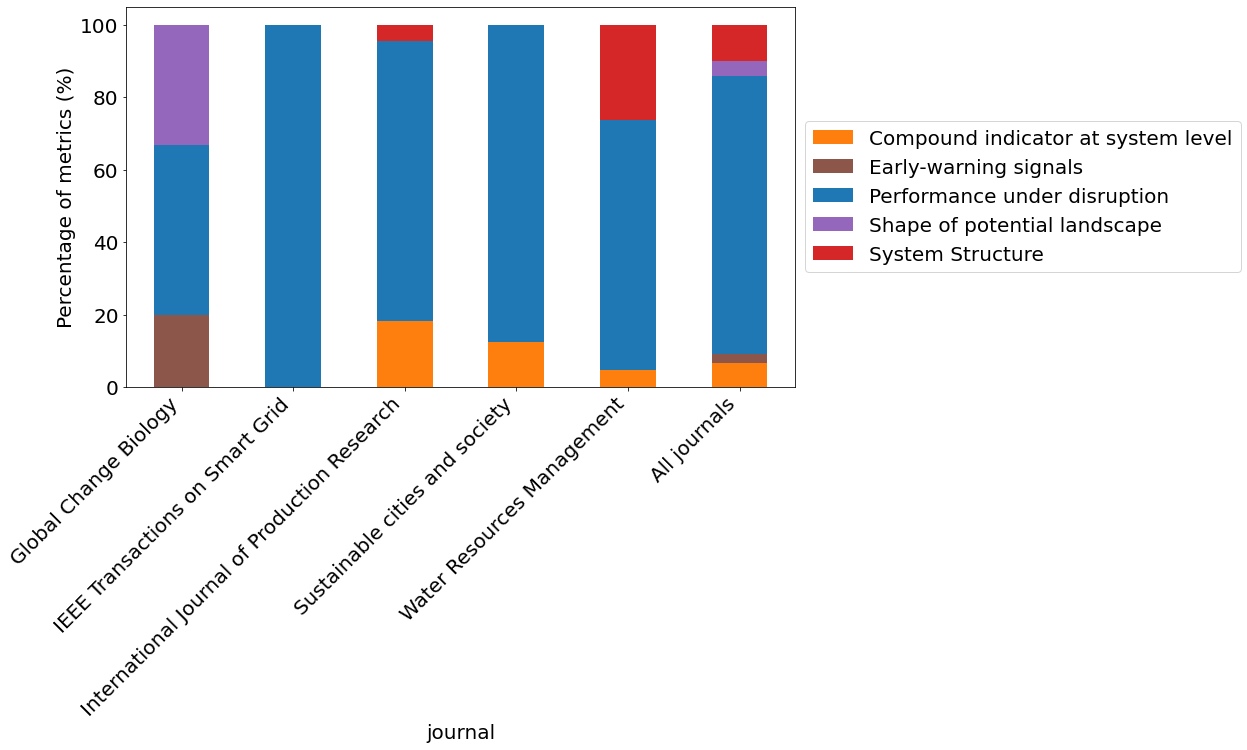

In [7]:
# Metric category per topic model

dfGroup = df.groupby(['journal', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All journals'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)
dfGroup *= 100

colors = [category_colors[cat] for cat in dfGroup.columns]
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage of metrics (%)")

plt.show()

In [8]:
# Proportion of agency and diversity-based metrics per Journal and overall
dfAgency = df[['journal', 'agency-based3']].groupby('journal').sum()
dfAgency = dfAgency.unstack()

dfGroup = df[['journal']].groupby('journal').size()
all_proportion = dfAgency.sum(axis=0) / dfGroup.sum(axis=0).sum()

dfAgency = dfAgency.div(dfGroup)
dfAgency.loc['All journals'] = all_proportion

print(dfAgency)

dfDiversity = df[['journal', 'diversity-based']].groupby('journal').sum()
dfDiversity = dfDiversity.unstack()

dfGroup = df[['journal']].groupby('journal').size()
all_proportion = dfDiversity.sum(axis=0) / dfGroup.sum(axis=0).sum()

dfDiversity = dfDiversity.div(dfGroup)
dfDiversity.loc['All journals'] = all_proportion

print(dfDiversity)

               journal                                     
agency-based3  Global Change Biology                           0.000000
               IEEE Transactions on Smart Grid                 0.000000
               International Journal of Production Research    0.090909
               Sustainable cities and society                  0.117647
               Water Resources Management                      0.000000
All journals                                                   0.033333
dtype: float64
                 journal                                     
diversity-based  Global Change Biology                           0.066667
                 IEEE Transactions on Smart Grid                 0.000000
                 International Journal of Production Research    0.136364
                 Sustainable cities and society                  0.117647
                 Water Resources Management                      0.285714
All journals                                                 

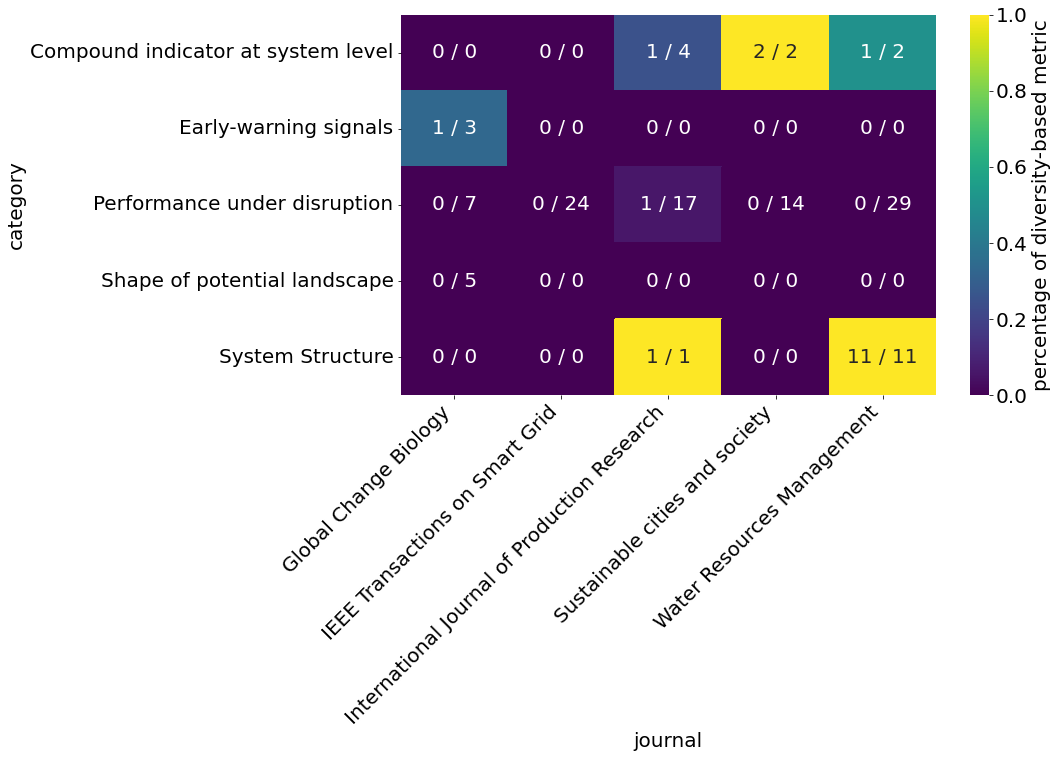

In [9]:
# Diversity-based metric per category and topic model

number_diversity = df[['journal', 'category', 'diversity-based']].groupby(['journal', 'category']).sum()
number_diversity = number_diversity['diversity-based'].map(int)
number_metric = df[['journal', 'category', 'diversity-based']].groupby(['journal', 'category']).count()
number_metric = number_metric['diversity-based']

annotate = number_diversity.map(str) + ' / ' + number_metric.map(str)
annotate = annotate.unstack().T.fillna('0 / 0')

percentage = number_diversity / number_metric
percentage = percentage.unstack().T.fillna(0)

plt.figure(figsize=(12, 7))
label_cbar = 'percentage of diversity-based metric'
sns.heatmap(percentage, annot=annotate, fmt="", cbar_kws={'label': label_cbar}, cmap='viridis')
plt.xticks(rotation=45, ha='right')

plt.show()

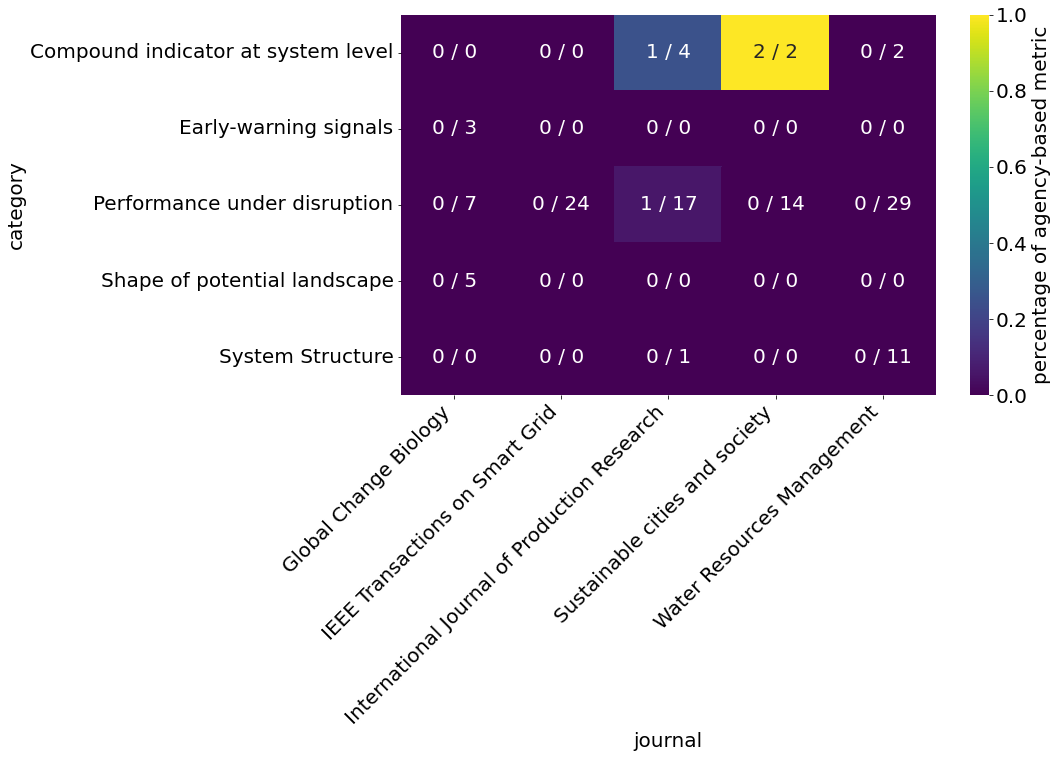

In [10]:
# Diversity-based metric per category and topic model


number_agency3 = df[['journal', 'category', 'agency-based3']].groupby(['journal', 'category']).sum()
number_agency3 = number_agency3['agency-based3'].map(int)
number_metric = df[['journal', 'category', 'agency-based3']].groupby(['journal', 'category']).count()
number_metric = number_metric['agency-based3']

annotate = number_agency3.map(int).map(str) + ' / ' + number_metric.map(str)
annotate = annotate.unstack().T.fillna('0 / 0')

percentage = number_agency3 / number_metric
percentage = percentage.unstack().T.fillna(0)

plt.figure(figsize=(12, 7))
label_cbar = 'percentage of agency-based metric'
sns.heatmap(percentage, annot=annotate, fmt="", cbar_kws={'label': label_cbar}, cmap='viridis')

plt.xticks(rotation=45, ha='right')

plt.show()

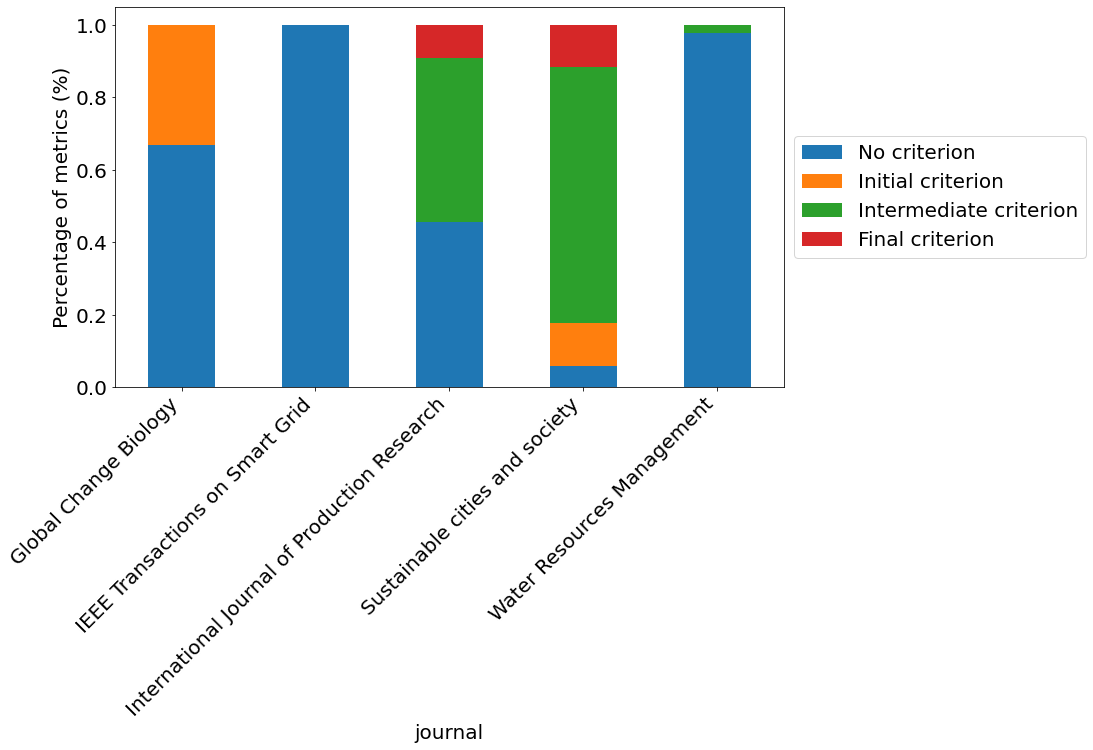

In [11]:
# agency-based metric per category and discipline

dfGroup = df[['journal']].groupby('journal').size()
dfAgency = df[['journal', 'agency-based1', 'agency-based2', 'agency-based3']].groupby('journal').sum()

dfAgency['not_agency'] = dfGroup - dfAgency['agency-based1']
dfAgency['agency-based2'] = dfAgency['agency-based2'] - dfAgency['agency-based3']
dfAgency['agency-based1'] =  dfAgency['agency-based1'] - dfAgency['agency-based2'] - dfAgency['agency-based3']

dfAgency = dfAgency.divide(dfGroup, axis=0)
dfAgency = dfAgency[['not_agency', 'agency-based1', 'agency-based2', 'agency-based3']]
dfAgency.columns = ['No criterion', 'Initial criterion', 'Intermediate criterion', 'Final criterion']

dfAgency.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Percentage of metrics (%)")

plt.show()